Importing Libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()

True

Data Preprocessing

In [23]:
training_set=tf.keras.utils.image_dataset_from_directory(
    './train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(360, 360),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21126 files belonging to 14 classes.


Validation Image Preprocessing

In [24]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    './valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(360, 360),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5277 files belonging to 14 classes.


In [25]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 360, 360, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 14), dtype=tf.float32, name=None))>

In [26]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[139.05556  169.05556  169.05556 ]
   [142.       182.33333  181.16667 ]
   [146.43024  188.43024  186.43024 ]
   ...
   [205.27783  216.27783  148.36357 ]
   [193.86845  202.86845  146.29068 ]
   [175.46614  187.46614  141.35481 ]]

  [[142.68889  172.68889  172.68889 ]
   [141.73334  183.06667  176.90001 ]
   [149.       192.       185.      ]
   ...
   [205.17596  215.17596  152.17596 ]
   [195.16675  204.16675  151.16675 ]
   [181.09091  193.09091  146.97958 ]]

  [[140.21915  172.3858   169.33025 ]
   [149.05556  185.05556  181.05556 ]
   [145.       182.       174.      ]
   ...
   [202.27783  216.27783  155.      ]
   [192.9537   204.9537   156.62021 ]
   [179.16699  194.05566  151.05566 ]]

  ...

  [[ 64.94444  111.94444   41.944443]
   [ 52.546387 101.54639   35.546387]
   [ 76.48443  118.48443   54.48443 ]
   ...
   [ 50.5402    81.7067    34.984535]
   [ 45.157467  82.82397   32.416977]
   [ 41.06186   81.06186   28.061861]]

  [[ 59.653675 105.65367   40.6536

In [27]:
validation_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 360, 360, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 14), dtype=tf.float32, name=None))>

To avoid overfitting


    1.  Choose small learning rate default 0.001 we are taking 0.0001
    2.  There may be chance of Underfitting, so increase number of neuron
    3.  Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant
        feature or  model is confusing due to lack of feature so feed with more feature

Building Model

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [29]:
model=Sequential()

Building Convolution Layer

In [30]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[360, 360, 3]))   #activation='relu': This specifies the activation function used in this layer. 'relu' stands for Rectified Linear Unit, which is a common choice for hidden layers in neural networks due to its ability to introduce non-linearity into the model.
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [31]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [32]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [33]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [34]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [35]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [36]:
model.add(Flatten())
model.add(Dropout(0.25))#To aviod overfitting

Flatning

In [37]:
model.add(Dense(units=1700, activation='relu'))

In [38]:
model.add(Dropout(0.4))

Output Layer

In [39]:
model.add(Dense(units=14, activation='softmax'))

Compiling Model

In [40]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 360, 360, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 358, 358, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 179, 179, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 179, 179, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 177, 177, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 88, 88, 64)       0         
 2D)                                                  

# Model Training

In [42]:
# to stop model training at a curtain condition
from keras.callbacks import EarlyStopping

# Instantiate the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

# Train your model
history = model.fit(x=training_set, validation_data=validation_set, epochs=50, callbacks=[early_stopping])

Epoch 1/50


2641/2641 [==============================] - 504s 190ms/step - loss: 1.6721 - accuracy: 0.4013 - val_loss: 1.1361 - val_accuracy: 0.5738
Epoch 2/50
2641/2641 [==============================] - 503s 190ms/step - loss: 0.7480 - accuracy: 0.7564 - val_loss: 0.7155 - val_accuracy: 0.7828
Epoch 3/50
2641/2641 [==============================] - 504s 191ms/step - loss: 0.5468 - accuracy: 0.8314 - val_loss: 0.5170 - val_accuracy: 0.8414
Epoch 4/50
2641/2641 [==============================] - 502s 190ms/step - loss: 0.4645 - accuracy: 0.8571 - val_loss: 0.4889 - val_accuracy: 0.8594
Epoch 5/50
2641/2641 [==============================] - 501s 190ms/step - loss: 0.4142 - accuracy: 0.8703 - val_loss: 0.5588 - val_accuracy: 0.8516
Epoch 6/50
2641/2641 [==============================] - 500s 189ms/step - loss: 0.3606 - accuracy: 0.8837 - val_loss: 0.5863 - val_accuracy: 0.8346
Epoch 7/50
2641/2641 [==============================] - 504s 191ms/step - loss: 0.3182 - accuracy: 0.8962 - val_loss: 0.516

# Model Evalution
    Model Evalution on training set

In [43]:
train_loss,train_acc=model.evaluate(training_set)

2641/2641 [==============================] - 163s 61ms/step - loss: 0.0942 - accuracy: 0.9700


In [44]:
print(train_loss,train_acc)

0.09421837329864502 0.9700369238853455


    Model Evalution on validation set

In [45]:
val_loss,val_acc=model.evaluate(validation_set)

660/660 [==============================] - 41s 61ms/step - loss: 0.7145 - accuracy: 0.8795


In [46]:
print(val_loss,val_acc)

0.7144642472267151 0.8794769644737244


# Saving Model

In [47]:
model.save("trained_model11.h5")

why use keras //more compressed file

In [48]:
model.save("trained_model.keras")

In [49]:
history.history

{'loss': [1.6721022129058838,
  0.7480489015579224,
  0.5468349456787109,
  0.4645066261291504,
  0.4141790270805359,
  0.3606494069099426,
  0.3182440996170044,
  0.2751178741455078,
  0.22384506464004517,
  0.1954752653837204,
  0.15895967185497284,
  0.12778736650943756,
  0.11005128175020218,
  0.09861449897289276,
  0.09205324202775955,
  0.08327522873878479,
  0.08081047981977463,
  0.07395338267087936,
  0.07598170638084412],
 'accuracy': [0.4012591242790222,
  0.7563665509223938,
  0.8313925862312317,
  0.8571428656578064,
  0.870254635810852,
  0.8836504817008972,
  0.8961942791938782,
  0.9073179960250854,
  0.926015317440033,
  0.9333522915840149,
  0.9461327195167542,
  0.9573984742164612,
  0.9632206559181213,
  0.9689955711364746,
  0.9698949456214905,
  0.9733977317810059,
  0.9753857851028442,
  0.9754331111907959,
  0.9760957956314087],
 'val_loss': [1.1360541582107544,
  0.7154526710510254,
  0.5169567465782166,
  0.4889463484287262,
  0.5587981343269348,
  0.58625650

# Recording History


In [50]:
import json
with open("training_hist.json","w") as f:
    json.dump(history.history,f)  #store everything which is genrated by the command "training_history.history" on file "training_hist.json"

# Accuracy Visualition


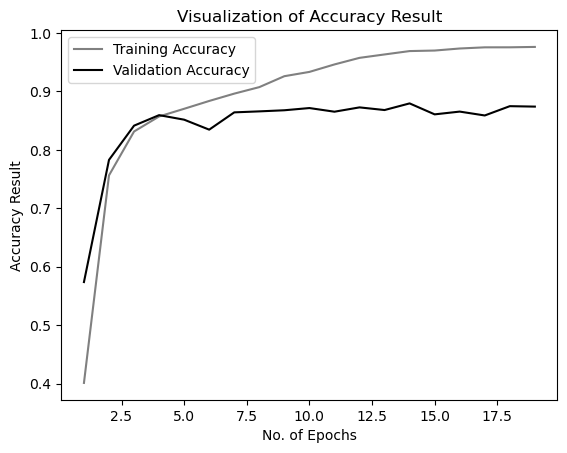

In [53]:
epochs =[i for i in range(1,20)]
plt.plot(epochs,history.history['accuracy'],color='grey',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='black',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Some other metricis for model evaluation

In [54]:
class_name=validation_set.class_names
class_name

['Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'complex',
 'frog_eye_leaf_spot',
 'frog_eye_leaf_spot_complex',
 'healthy',
 'powdery_mildew',
 'powdery_mildew_complex',
 'rust',
 'rust_complex',
 'rust_frog_eye_leaf_spot',
 'scab',
 'scab_frog_eye_leaf_spot',
 'scab_frog_eye_leaf_spot_complex']

In [55]:
test_set=tf.keras.utils.image_dataset_from_directory(
    './valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(360, 360),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5277 files belonging to 14 classes.


In [56]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

660/660 [==============================] - 40s 60ms/step


(array([[9.9999833e-01, 1.4464587e-07, 1.8091183e-09, ..., 7.7877479e-07,
         2.0992297e-10, 8.8427521e-15],
        [9.9999762e-01, 2.0352320e-06, 3.1666472e-11, ..., 4.0552865e-07,
         4.1455178e-10, 4.9200702e-14],
        [9.9952793e-01, 1.5976559e-05, 4.3300874e-09, ..., 4.4299354e-04,
         2.1322109e-07, 1.1456695e-11],
        ...,
        [3.1295582e-05, 3.6891797e-03, 2.4705747e-01, ..., 6.8461794e-01,
         9.7150328e-03, 2.7012553e-03],
        [1.1550508e-09, 1.6911933e-06, 5.7855421e-01, ..., 3.8112576e-06,
         5.9647416e-04, 8.0098136e-04],
        [8.6687924e-04, 2.2169947e-06, 2.7131318e-04, ..., 1.1810613e-02,
         9.8325944e-01, 3.9566858e-06]], dtype=float32),
 (5277, 14))

In [57]:
predicted_categories=tf.argmax(y_pred,axis=1) #extracting the maximum probablity of class

In [58]:
predicted_categories

<tf.Tensor: shape=(5277,), dtype=int64, numpy=array([ 0,  0,  0, ..., 11,  2, 12], dtype=int64)>

In [59]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(5277, 14), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [60]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(5277,), dtype=int64, numpy=array([ 0,  0,  0, ..., 13, 13, 13], dtype=int64)>

Calculating Precision recall

![image-2.png](attachment:image-2.png)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

![image.png](attachment:image.png)

In [62]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                 precision    recall  f1-score   support

              Apple___Black_rot       0.97      0.99      0.98       397
       Apple___Cedar_apple_rust       0.99      1.00      0.99       352
                        complex       0.61      0.38      0.47       320
             frog_eye_leaf_spot       0.79      0.95      0.86       636
     frog_eye_leaf_spot_complex       0.11      0.03      0.05        33
                        healthy       0.95      0.96      0.96      1326
                 powdery_mildew       0.87      0.91      0.89       236
         powdery_mildew_complex       0.12      0.06      0.08        17
                           rust       0.83      0.91      0.87       372
                   rust_complex       0.00      0.00      0.00        19
        rust_frog_eye_leaf_spot       0.00      0.00      0.00        24
                           scab       0.92      0.96      0.94      1368
        scab_frog_eye_leaf_spot       0.38      0.

c:\Users\abhay\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abhay\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abhay\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


        Calculating Confussion Matrix

In [63]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[ 395,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           2,    0,    0],
       [   0,  352,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   2,    0,  121,   73,    7,    5,    0,    2,   28,    0,    0,
          35,   35,   12],
       [   1,    0,    1,  605,    0,    5,    2,    1,    4,    0,    0,
          12,    4,    1],
       [   0,    0,   15,   14,    1,    0,    0,    0,    0,    0,    0,
           0,    3,    0],
       [   2,    1,    0,    2,    0, 1269,   15,    0,    4,    0,    0,
          33,    0,    0],
       [   0,    0,    1,    1,    0,   10,  215,    2,    2,    0,    0,
           5,    0,    0],
       [   0,    0,    4,    0,    0,    1,    9,    1,    1,    0,    0,
           1,    0,    0],
       [   0,    0,    2,    9,    0,    4,    2,    0,  340,    0,    5,
          10,    0,    0],
       [   0,    0,    4,    3,    0,    1,    0,    0,   10,    0,    0,
           0,    

In [64]:
cm.shape

(14, 14)

                Confusion Matrix Visualization

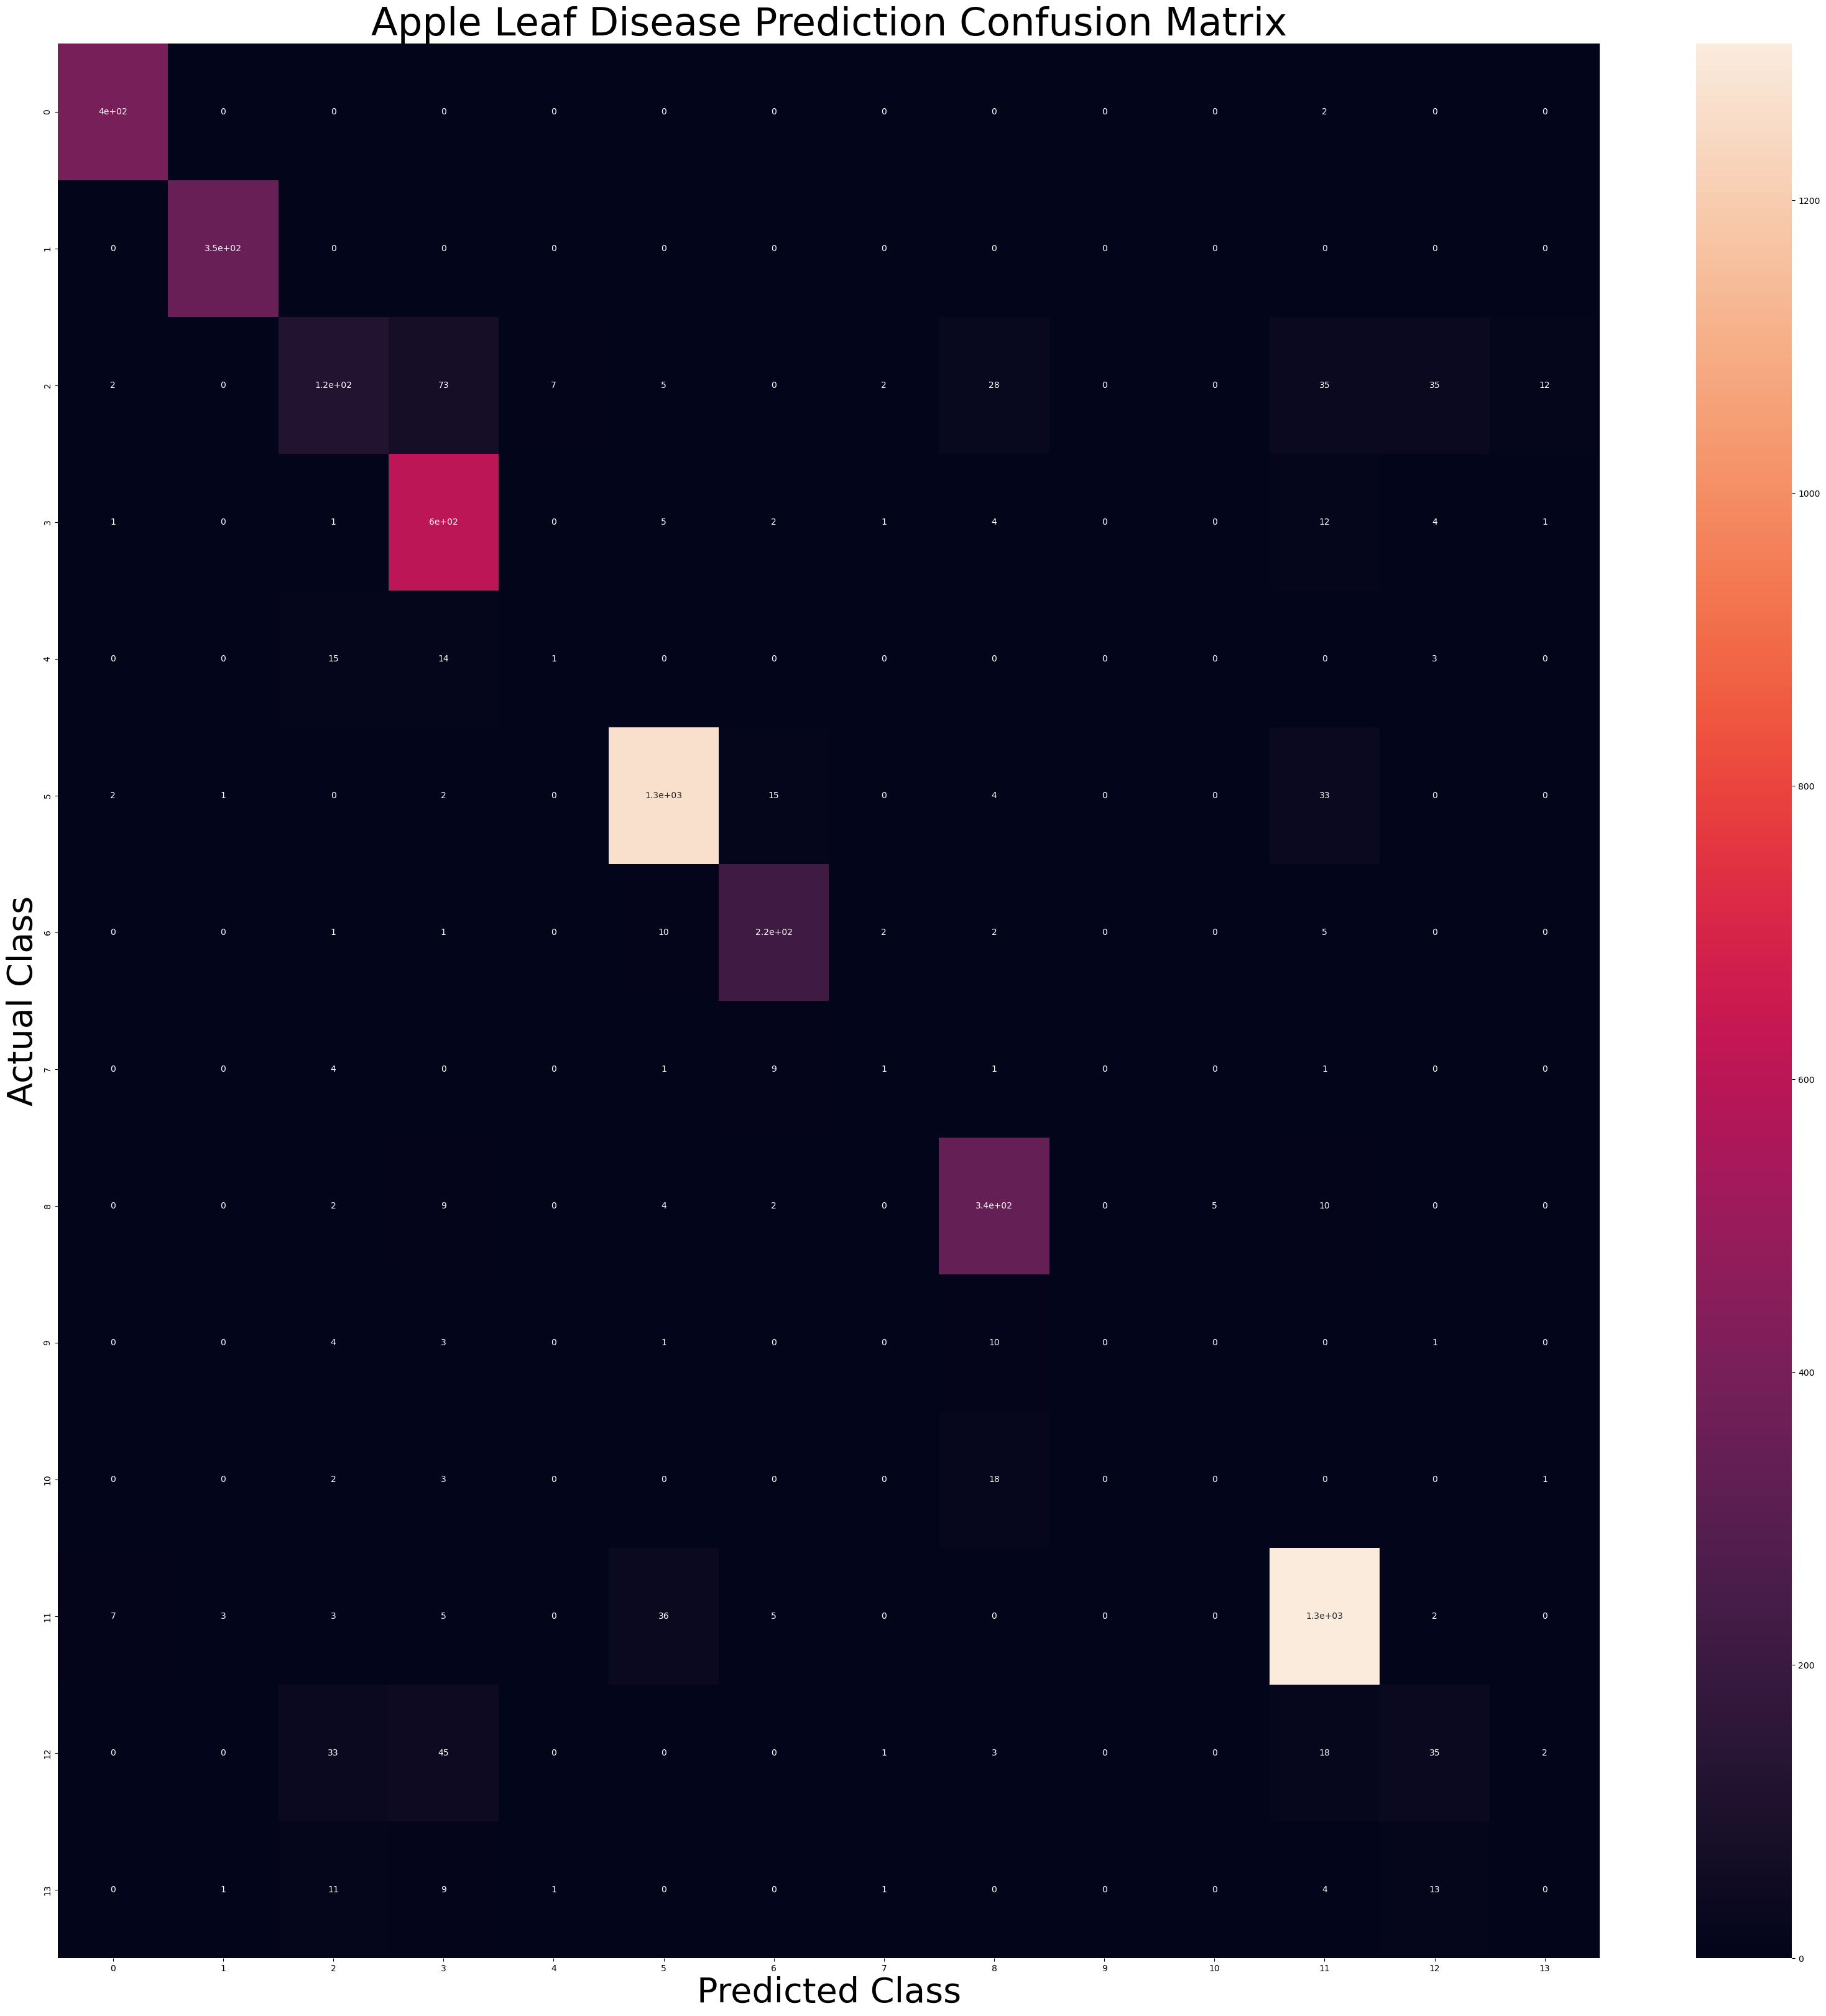

In [65]:
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=40)
plt.ylabel("Actual Class", fontsize=40)
plt.title("Apple Leaf Disease Prediction Confusion Matrix", fontsize=45)
plt.show()  